#### TOP 10 PIZZA restaurants DELIVEROO

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Step 1: Connect to the SQLite database
db_path = r"..\databases\deliveroo.db"
connection = sqlite3.connect(db_path)



In [5]:
# Step 2: Query the top pizza restaurants
query = """
SELECT DISTINCT name AS restaurant_name, category, address, rating, latitude, longitude
FROM restaurants
WHERE category LIKE '%pizza%' or name LIKE '%pizza%'
ORDER BY rating DESC
LIMIT 10;
"""
query_pizza = """
SELECT DISTINCT restaurants.name AS restaurant_name, category, address, rating, latitude, longitude
FROM restaurants
JOIN categories ON restaurants.id = categories.restaurant_id
WHERE categories.name LIKE '%pizz%'
ORDER BY restaurants.rating DESC
LIMIT 10;
"""

In [6]:
# Step 3: Create a DataFrame
top_10_df = pd.read_sql_query(query, connection)
top_10pizza_df = pd.read_sql_query(query_pizza, connection)
# Close the connection to the database (this may help avoiding database locks)
connection.close()

In [7]:
# Step 4: Add a star rating column
top_10_df["Star Rating"] = top_10_df["rating"].apply(lambda x: "★" * int(x) + "☆" * (5 - int(x))
)
top_10pizza_df["Star Rating"] = top_10pizza_df["rating"].apply(lambda x: "★" * int(x) + "☆" * (5 - int(x)))
print(top_10pizza_df.head())

             restaurant_name    category  \
0               De Superette      Brunch   
1                     ÖZ AHI     Turkish   
2           Trattoria Murano     Italian   
3                Place 2 Eat  Sandwiches   
4  Pizza Hut Strombeek-Bever     Italian   

                                             address  rating   latitude  \
0                Guldenspoorstraat 29, Gent, Belgium     4.8  51.045489   
1                         Sint bernardsesteenweg 322     4.8  51.189949   
2                   Philipstockstraat 33,8000 Brugge     4.8  51.209644   
3                                    6 Stationsplein     4.7  50.948380   
4  Pizza Hut Strombeek-Bever Sint-Annastraat 1 st...     4.6  50.902511   

   longitude Star Rating  
0   3.729975       ★★★★☆  
1   4.377872       ★★★★☆  
2   3.226661       ★★★★☆  
3   3.129624       ★★★★☆  
4   4.361492       ★★★★☆  


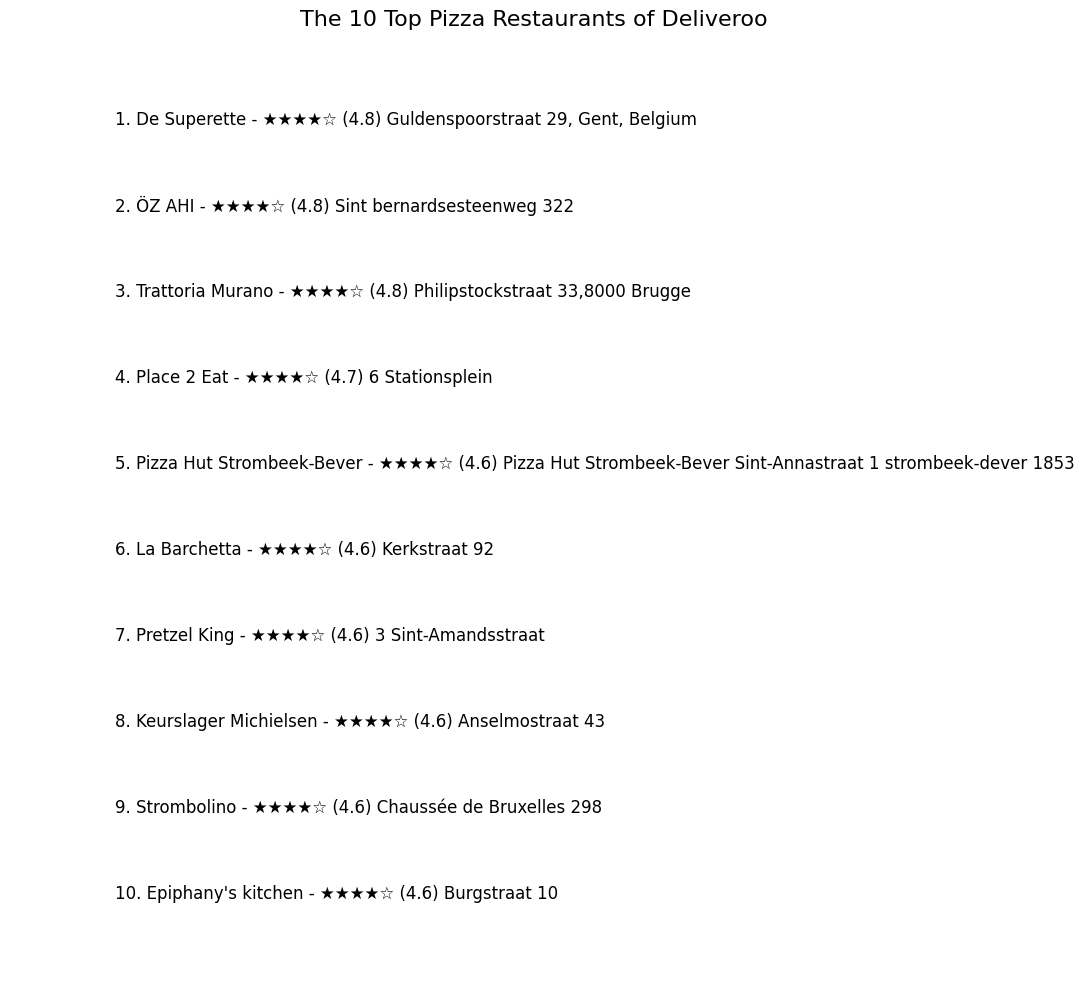

In [8]:
# Step 5: Generate the visualization
df = top_10pizza_df

fig, ax = plt.subplots(figsize=(12, len(df)))  # Dynamically adjust size based on number of entries

# Iterate over the DataFrame to add sequential numbering, restaurant, rating, and location details
for i, row in df.iterrows():
    plt.text(
        0.1,
        len(df) - 1 - i,  # Adjust for proper positioning from top to bottom
        f"{i + 1}. {row['restaurant_name']} - {row['Star Rating']} ({row['rating']:.1f}) {row['address']}",
        fontsize=12,
        color="black",
        verticalalignment="center"
    )

# Add a title to the visualization
plt.title("The 10 Top Pizza Restaurants of Deliveroo", fontsize=16)

# Turn off axes for a clean visual
plt.gca().axis("off")
plt.gca().set_ylim(-1, len(df))  

# Display the chart
plt.tight_layout()
plt.show()


### Interactive map of Belgium

In [87]:
import folium
from folium.plugins import MarkerCluster
import webbrowser

# Remove rows that have NaN in the latitude or longitude columns
df_clean = df.dropna(subset=['latitude', 'longitude'])

# Create a map with the appropriate center
properties = folium.Map(location=[df_clean['latitude'].mean(), df_clean['longitude'].mean()], zoom_start=9)

folium.TileLayer('Stamen Toner', attr='Map tiles by Stamen Design, CC BY 3.0 — Map data © OpenStreetMap').add_to(properties)

# Add MarkerCluster to improve performance with large numbers of markers
#marker_cluster = MarkerCluster().add_to(properties)

# Add tags to the cluster
for index, row in df_clean.iterrows():
    # This is where you add the text and values you want to display on click
    text = f"""
    Restaurant: {row['restaurant_name']} €<br>
    Rating: {row['Star Rating']}<br>
    """
    folium.Marker(
        [row['latitude'], row['longitude']],
        popup=folium.Popup(text, max_width=400),
        tooltip=row['restaurant_name'] # This is where you add the text and values you want to display on hover over
        ).add_to(properties)

properties

# Save map to the html
map_path = r"..\assets\geo\pizza_top10_deliveroo_interactive.html"
properties.save(map_path)

# Open map in browser
webbrowser.open(map_path)


True

#### TOP 10 PIZZA restaurants TAKEAWAY

               primarySlug          restaurant_name             name  \
0     trend-kebab-pizzeria   Trend Kebab & Pizzeria          Pizza's   
1                 snack-it                 Snack-It          Pizza's   
2           munchies-ieper           Munchies Ieper  Pizzas (medium)   
3                  la-trca     La Trinacria Bottega          Pizza's   
4  eethuis-carlos-aarschot  De Echte Eethuis Carlos          Pizza's   

                 address  rating   latitude  longitude Star Rating  
0          Marktstraat 1     5.0  51.094082   5.792328       ★★★★★  
1     Guldensporenlei 10     5.0  51.325359   4.938367       ★★★★★  
2            Neermarkt 4     5.0  50.850702   2.885102       ★★★★★  
3           Tomberg 257A     5.0  50.844145   4.420404       ★★★★★  
4  Herseltsesteenweg 207     5.0  51.002308   4.835920       ★★★★★  


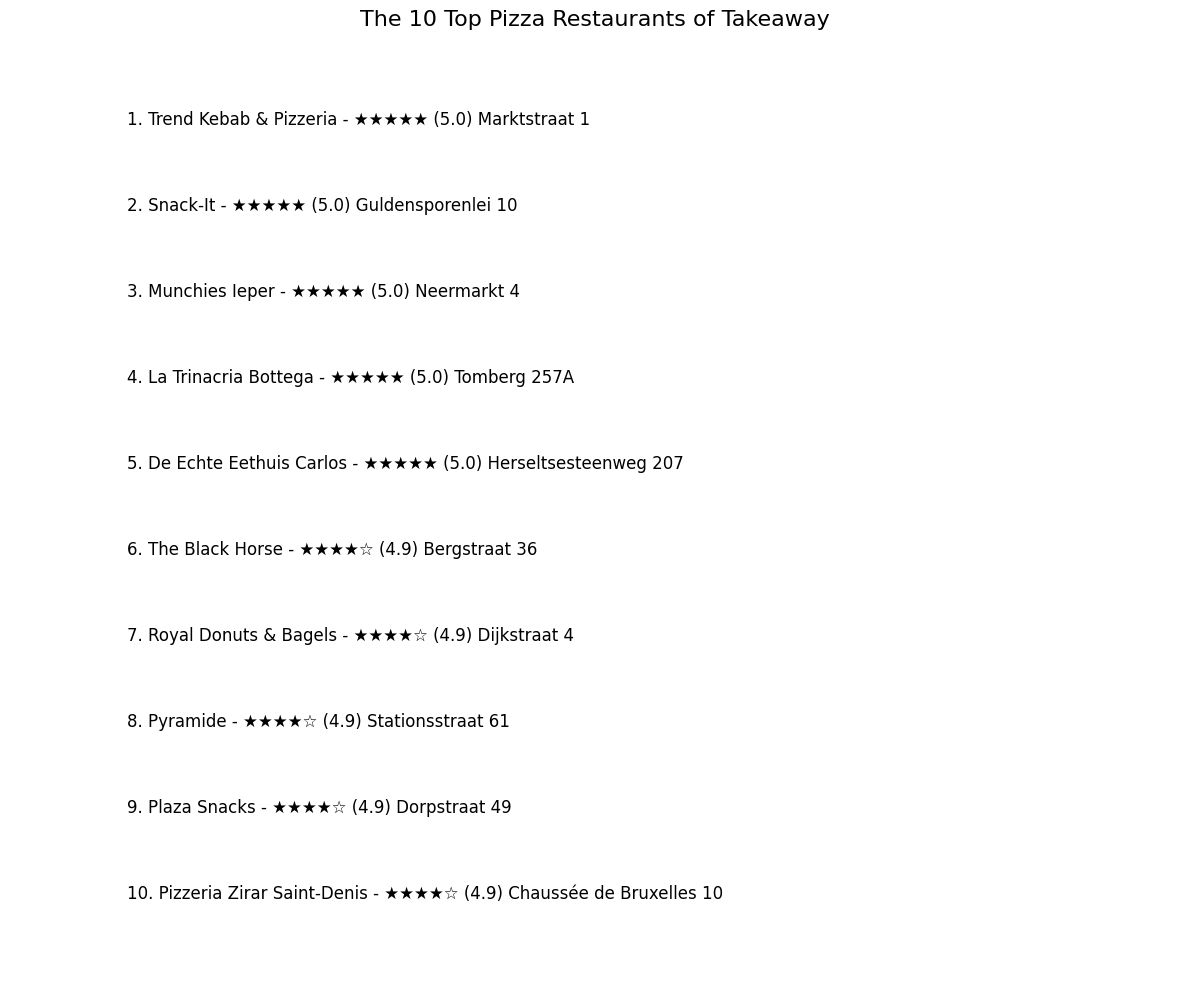

In [98]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Connect to the SQLite database
db_path = r"..\databases\takeaway.db"
connection = sqlite3.connect(db_path)

# Step 2: Query the top pizza restaurants

query_pizza = """
SELECT DISTINCT restaurants.primarySlug, restaurants.name AS restaurant_name, categories.name, address, restaurants.ratings AS rating, latitude, longitude
FROM restaurants
JOIN categories ON restaurants.primarySlug = categories.restaurant_id
WHERE categories.name LIKE '%pizz%' AND latitude != 0 AND longitude != 0
GROUP BY restaurants.primarySlug
ORDER BY rating DESC
LIMIT 10;
"""

# Step 3: Create a DataFrame
top_10pizza_df = pd.read_sql_query(query_pizza, connection)
# Close the connection to the database (this may help avoiding database locks)
connection.close()

# Step 4: Add a star rating column

top_10pizza_df["Star Rating"] = top_10pizza_df["rating"].apply(lambda x: "★" * int(x) + "☆" * (5 - int(x)))
print(top_10pizza_df.head())

# Step 5: Generate the visualization
df = top_10pizza_df

fig, ax = plt.subplots(figsize=(12, len(df)))  # Dynamically adjust size based on number of entries

# Iterate over the DataFrame to add sequential numbering, restaurant, rating, and location details
for i, row in df.iterrows():
    plt.text(
        0.1,
        len(df) - 1 - i,  # Adjust for proper positioning from top to bottom
        f"{i + 1}. {row['restaurant_name']} - {row['Star Rating']} ({row['rating']:.1f}) {row['address']}",
        fontsize=12,
        color="black",
        verticalalignment="center"
    )

# Add a title to the visualization
plt.title("The 10 Top Pizza Restaurants of Takeaway", fontsize=16)

# Turn off axes for a clean visual
plt.gca().axis("off")
plt.gca().set_ylim(-1, len(df))  

# Display the chart
plt.tight_layout()
plt.show()


### Interactive map of Belgium

In [99]:
import folium
from folium.plugins import MarkerCluster
import webbrowser

# Remove rows that have NaN in the latitude or longitude columns
df_clean = df.dropna(subset=['latitude', 'longitude'])

# Create a map with the appropriate center
properties = folium.Map(location=[df_clean['latitude'].mean(), df_clean['longitude'].mean()], zoom_start=9)

folium.TileLayer('Stamen Toner', attr='Map tiles by Stamen Design, CC BY 3.0 — Map data © OpenStreetMap').add_to(properties)

# Add MarkerCluster to improve performance with large numbers of markers
#marker_cluster = MarkerCluster().add_to(properties)

# Add tags to the cluster
for index, row in df_clean.iterrows():
    # This is where you add the text and values you want to display on click
    text = f"""
    Restaurant: {row['restaurant_name']} €<br>
    Rating: {row['Star Rating']}<br>
    """
    folium.Marker(
        [row['latitude'], row['longitude']],
        popup=folium.Popup(text, max_width=400),
        tooltip=row['restaurant_name'] # This is where you add the text and values you want to display on hover over
        ).add_to(properties)

properties

# Save map to the html
map_path = r"..\assets\geo\pizza_top10_takeaway_interactive.html"
properties.save(map_path)

# Open map in browser
webbrowser.open(map_path)


True

#### TOP 10 PIZZA restaurants UBEREATS

                                     id  restaurant_name category  rating  \
0  b0bc113f-86e9-41ed-95e1-7e8d4957ac9f  Pizza Autentica   Pizzas     4.9   
1  5a603fd8-4bfa-44e7-a4ad-47063893957f       Fratello's   Pizzas     4.9   
2  17478ff5-ba5d-5166-ba01-48d1f97cb588   American pizza    Pizza     4.9   
3  62e69218-c421-4e02-afc0-42eb6d46c96e          Pizarro    Pizza     4.8   
4  40949220-4ff1-4b5e-b998-1b8c7a1b242d      Rosso Forno   Pizzas     4.8   

                                             address   latitude  longitude  \
0   De Limburg Stirumlaan 2, Wemmel, Vlaanderen 1780  50.906259   4.307947   
1  Rue Des Compagnons 12, Rez De ChaussÃ©, Bruxel...  50.855940   4.400330   
2  Tiensestraat, Number 107, Leuven, Vlaanderen 3000  50.876080   4.707540   
3       Melkmarkt 25 , Antwerpen, Vlaams Gewest 2000  51.220110   4.403120   
4      Oude Haachtsesteenweg 83, Machelen, EMEA 1831  50.894770   4.433190   

  Star Rating  
0       ★★★★☆  
1       ★★★★☆  
2       ★★★★☆  
3   

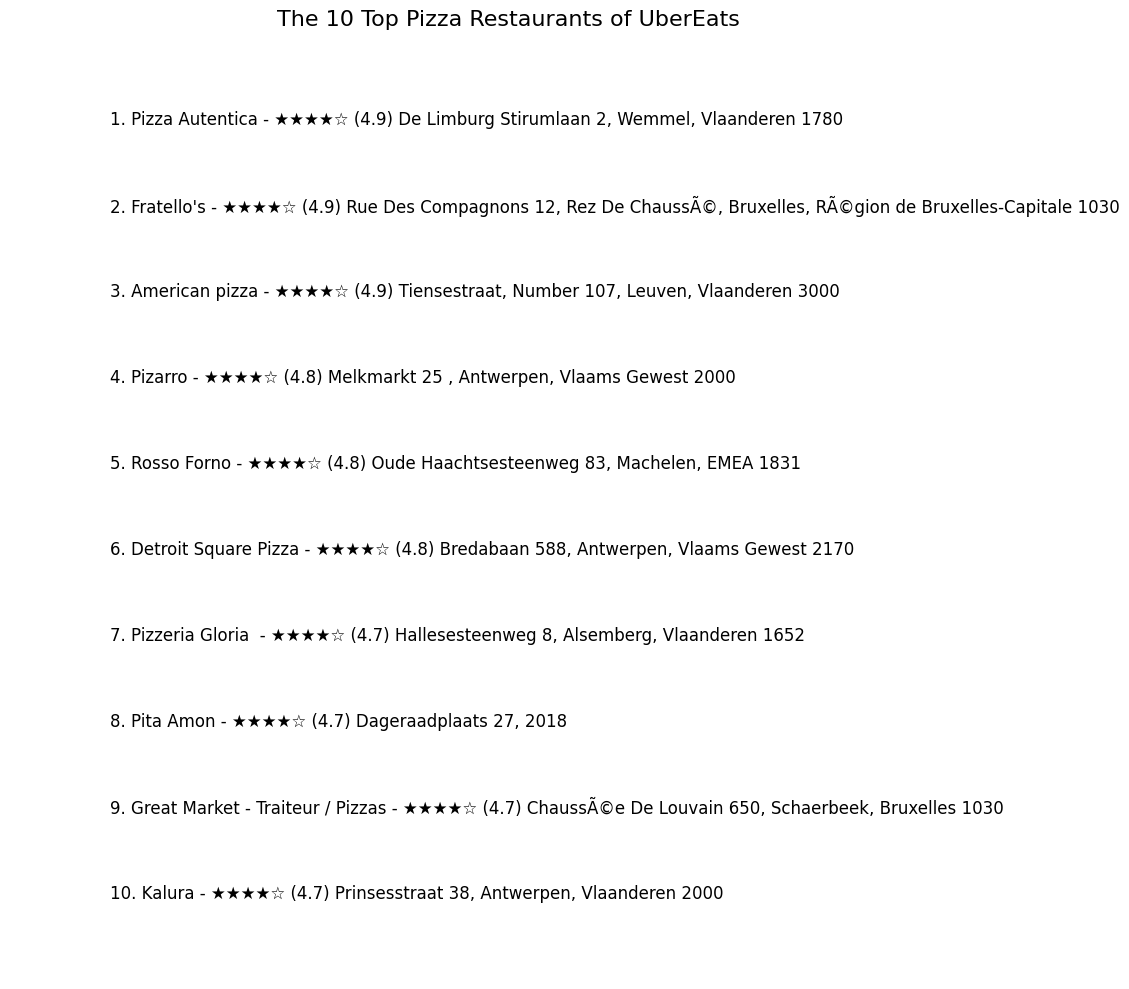

In [104]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Connect to the SQLite database
db_path = r"..\databases\ubereats.db"
connection = sqlite3.connect(db_path)

# Step 2: Query the top pizza restaurants

query_pizza = """
SELECT DISTINCT restaurants.id, restaurants.title AS restaurant_name, restaurant_to_categories.category, rating__rating_value AS rating, 
    restaurants.location__address AS address, restaurants.location__latitude AS latitude, restaurants.location__longitude AS longitude
FROM restaurants
JOIN restaurant_to_categories ON restaurants.id = restaurant_to_categories.restaurant_id
WHERE restaurant_to_categories.category LIKE '%pizz%' AND latitude != 0 AND longitude != 0
GROUP BY restaurants.id
ORDER BY restaurants.rating__rating_value DESC
LIMIT 10;
"""

# Step 3: Create a DataFrame
top_10pizza_df = pd.read_sql_query(query_pizza, connection)
# Close the connection to the database (this may help avoiding database locks)
connection.close()


# Step 4: Add a star rating column
top_10pizza_df["Star Rating"] = top_10pizza_df["rating"].apply(lambda x: "★" * int(x) + "☆" * (5 - int(x)))
# Change the data type of latitude and longitude from object to float
top_10pizza_df['latitude'] = top_10pizza_df['latitude'].astype(float)
top_10pizza_df['longitude'] = top_10pizza_df['longitude'].astype(float)
print(top_10pizza_df.head())

# Step 5: Generate the visualization
df = top_10pizza_df

fig, ax = plt.subplots(figsize=(12, len(df)))  # Dynamically adjust size based on number of entries

# Iterate over the DataFrame to add sequential numbering, restaurant, rating, and location details
for i, row in df.iterrows():
    plt.text(
        0.1,
        len(df) - 1 - i,  # Adjust for proper positioning from top to bottom
        f"{i + 1}. {row['restaurant_name']} - {row['Star Rating']} ({row['rating']:.1f}) {row['address']}",
        fontsize=12,
        color="black",
        verticalalignment="center"
    )

# Add a title to the visualization
plt.title("The 10 Top Pizza Restaurants of UberEats", fontsize=16)

# Turn off axes for a clean visual
plt.gca().axis("off")
plt.gca().set_ylim(-1, len(df))  

# Display the chart
plt.tight_layout()
plt.show()


### Interactive map of Belgium

In [105]:
import folium
from folium.plugins import MarkerCluster
import webbrowser

# Remove rows that have NaN in the latitude or longitude columns
df_clean = df.dropna(subset=['latitude', 'longitude'])

# Create a map with the appropriate center
properties = folium.Map(location=[df_clean['latitude'].mean(), df_clean['longitude'].mean()], zoom_start=9)

folium.TileLayer('Stamen Toner', attr='Map tiles by Stamen Design, CC BY 3.0 — Map data © OpenStreetMap').add_to(properties)

# Add MarkerCluster to improve performance with large numbers of markers
#marker_cluster = MarkerCluster().add_to(properties)

# Add tags to the cluster
for index, row in df_clean.iterrows():
    # This is where you add the text and values you want to display on click
    text = f"""
    Restaurant: {row['restaurant_name']} €<br>
    Rating: {row['Star Rating']}<br>
    """
    folium.Marker(
        [row['latitude'], row['longitude']],
        popup=folium.Popup(text, max_width=400),
        tooltip=row['restaurant_name'] # This is where you add the text and values you want to display on hover over
        ).add_to(properties)

properties

# Save map to the html
map_path = r"..\assets\geo\pizza_top10_ubereats_interactive.html"
properties.save(map_path)

# Open map in browser
webbrowser.open(map_path)


True